## Supervised learning methods that look at input variables and make predictions on the target variable. Techniques introduced are k nearest neighbors and logistic regression, as well as the metrics to evaluate such models.
## k nearest neighbors Logistic regression Evaluating classification models

Principle is to find the predifind number training samples, closest in distance to a new point, and predict the label from these
scikit-learn
kNN
this function relies only on the distance between the observations
apply pitagoras theory to find the Euclidian distance between tw observations

lazy learning algorithm
it is faster
training linera regression, SVM
Not working well with high dimentional data
high prediction cost for large dataset
not wokring well with categorical features
Non generlizing ml methods
clasification problems are ok, non parametric methods
succesful for classification problems with the decision boundry


** when the weight is uniform then asigns uniform weight to each neighbor
** weights is a distance then the weighst are asigned porpotionally to the invers of the distence from the query point


##Pima Indians Diabetes Database


The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline
#import data with
diabetes = pd.read_csv(rf'diabetes.csv', sep=',')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Build corelation matrix
diabetes.corr().sort_values(by='Outcome').style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


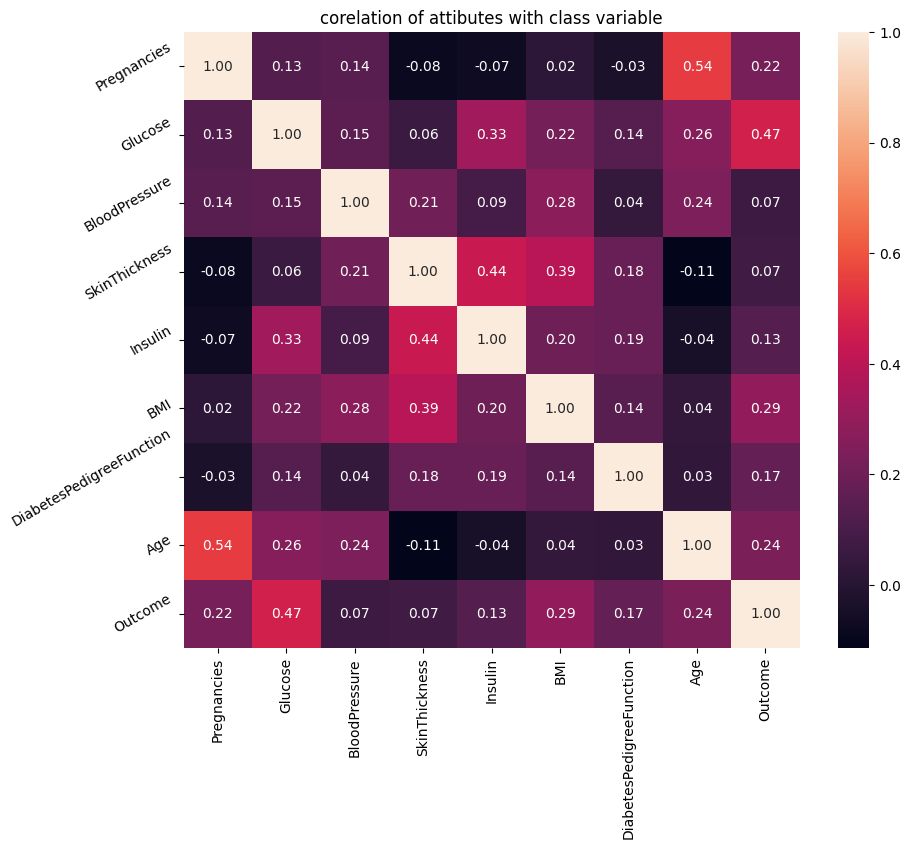

In [4]:
#heatmap
plt.figure(figsize=(10,8))
plt.title('corelation of attibutes with class variable')
a= sns.heatmap(diabetes.corr(), square=True, annot= True, fmt= '.2f', linecolor= 'white')
a.set_xticklabels(a.get_xticklabels(), rotation= 90)
a.set_yticklabels(a.get_yticklabels(), rotation= 30)
plt.show()

In [5]:
#looking at the Glucose and BMI becouse they have highes positive corelation with the outcome
#building two class classification using kNN
#show their associate decision boundries


<ipython-input-8-83934ed4637b>:40: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x= x[:,0], y= x[:,1], hue= y, palette= cmap_bold, alpha= 1.0, edgecolor= 'black')
<ipython-input-8-83934ed4637b>:40: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x= x[:,0], y= x[:,1], hue= y, palette= cmap_bold, alpha= 1.0, edgecolor= 'black')


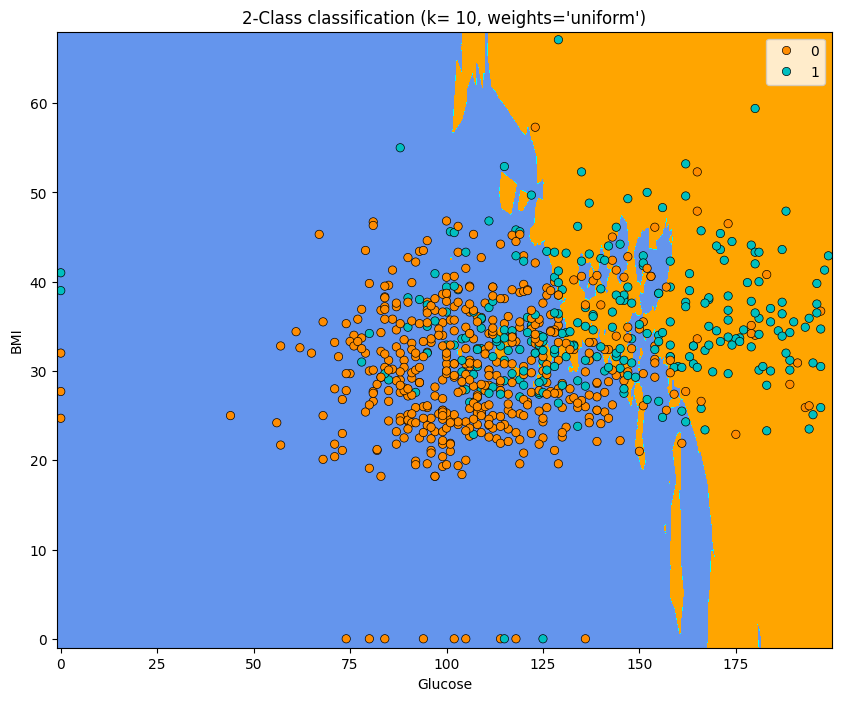

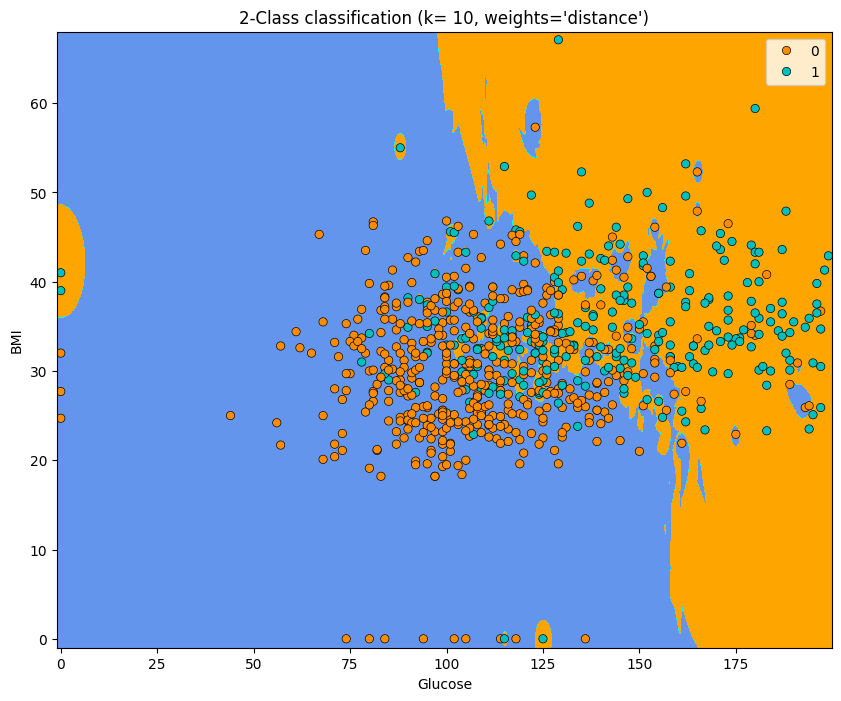

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import neighbors
xfeed = 'Glucose'
yfeed = 'BMI'
n_neighbors = 10

# Subsetting data
x = diabetes[[xfeed, yfeed]].to_numpy()

# Data containing the labels
y = diabetes.Outcome.to_numpy()

#step size in mesh
h = 0.1
cmap_light = ListedColormap(['cornflowerblue', 'cyan', 'orange'])
cmap_bold = ['darkorange', 'c', 'darkblue']


for weights in ['uniform', 'distance']:
    # Create an instance of Neighbors Classifier and fit the data
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(x, y)

    #plot the decision boundry
    x_min, x_max= x[:,0].min()- 1, x[:,0].max()+ 1
    y_min, y_max= x[:,1].min()- 1, x[:,1].max()+ 1
    xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z= clf.predict(np.c_[xx.ravel(), yy.ravel()])

    #put into the color
    Z= Z.reshape(xx.shape)
    plt.figure(figsize=(10,8))
    plt.contourf(xx, yy, Z, cmap= cmap_light)

    #plot the training points
    sns.scatterplot(x= x[:,0], y= x[:,1], hue= y, palette= cmap_bold, alpha= 1.0, edgecolor= 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"2-Class classification (k= %i, weights='%s')" % (n_neighbors, weights))
    plt.xlabel(xfeed)
    plt.ylabel(yfeed)

plt.show()



these features predicted well if the person has a diabetes


In [ ]:
#split diabetes data set into 2/3 and 1/3
#measuring the classifier exactnes and comletnes


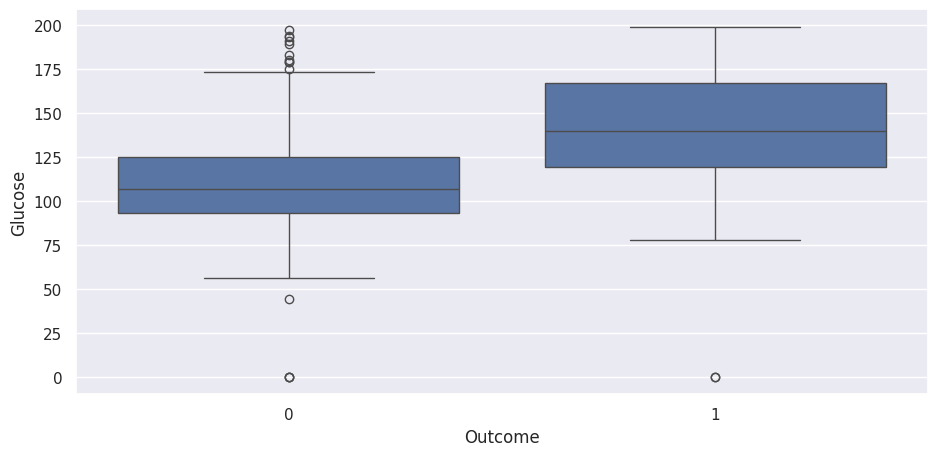

In [12]:
sns.set_theme(color_codes=True)
fig,ax=plt.subplots()
fig.set_size_inches(11,5)
sns.boxplot(y=xfeed, x=diabetes.Outcome,data=diabetes, ax=ax );
plt.show()

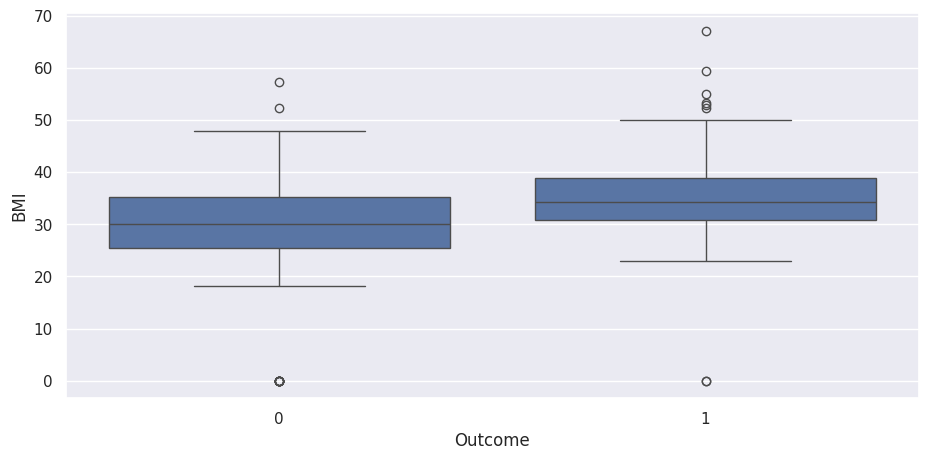

In [13]:
sns.set_theme(color_codes=True)
fig,ax=plt.subplots()
fig.set_size_inches(11,5)
sns.boxplot(y=yfeed, x=diabetes.Outcome,data=diabetes, ax=ax );
plt.show()

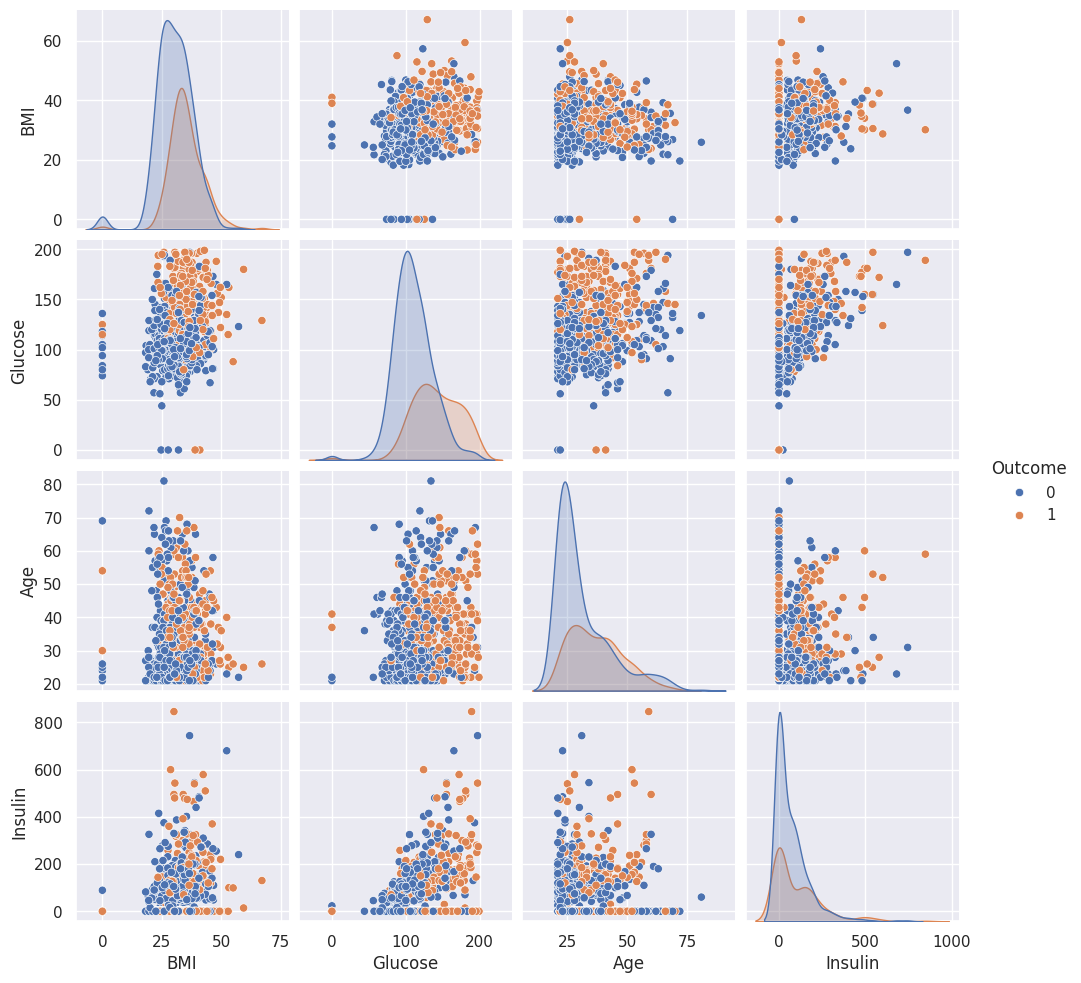

In [16]:
sns.pairplot(diabetes, vars= ['BMI','Glucose','Age','Insulin'] , hue= 'Outcome');
plt.show()

In [ ]:
#training and test sets


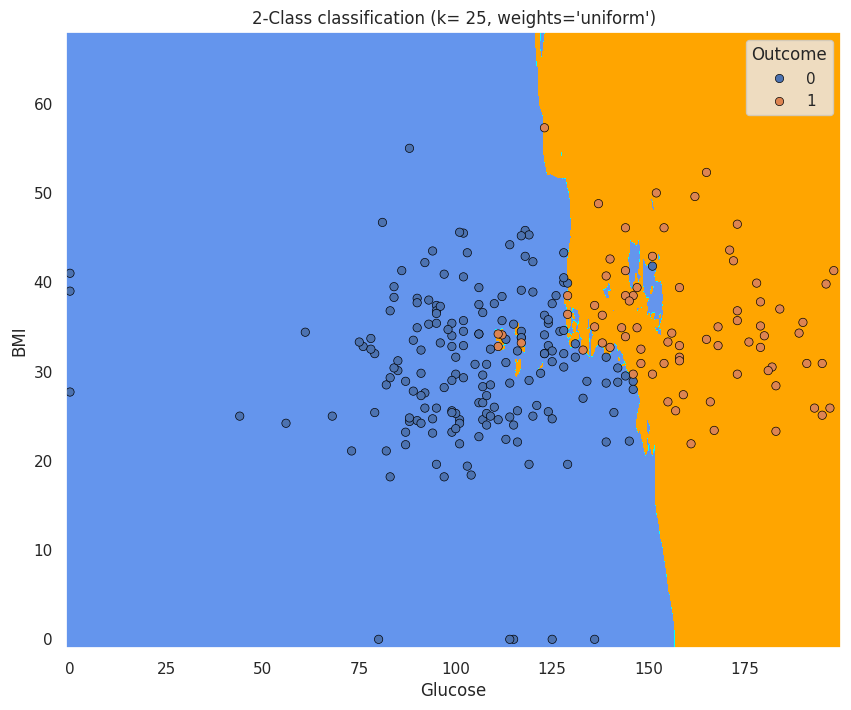

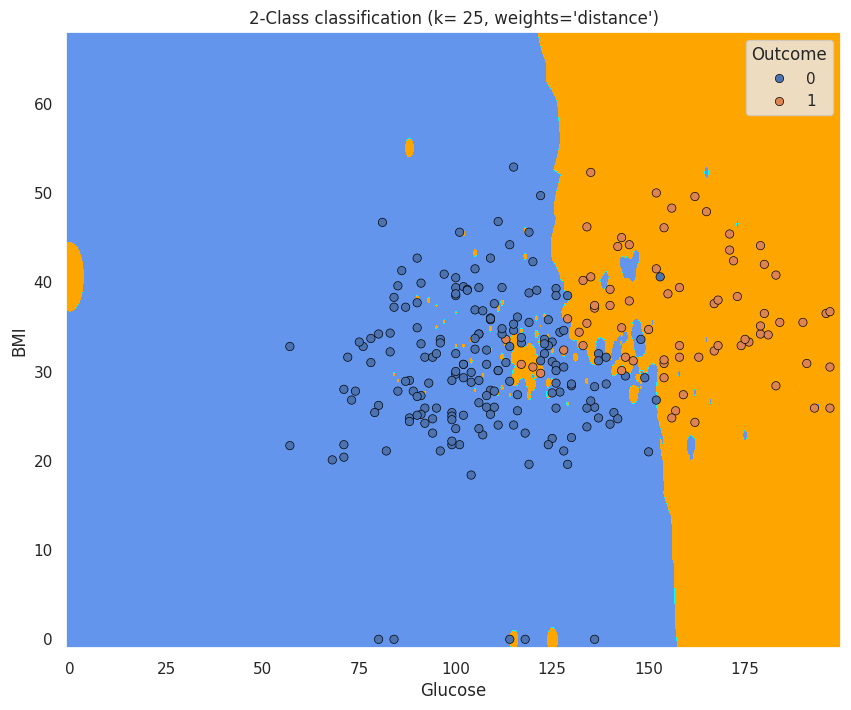

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import neighbors
xfeed = 'Glucose'
yfeed = 'BMI'
n_neighbors = 25

# Subsetting data
x = diabetes[[xfeed, yfeed]].to_numpy()

# Data containing the labels
y = diabetes.Outcome.to_numpy()

#step size in mesh
h = 0.1
cmap_light = ListedColormap(['cornflowerblue', 'cyan', 'orange'])
cmap_bold = ['darkorange', 'c', 'darkblue']


for weights in ['uniform', 'distance']:
#split the dataset
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.33)

    # Create an instance of Neighbors Classifier and fit the data
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(x_train, y_train)

    #plot the decision boundry
    x_min, x_max= x[:,0].min()- 1, x[:,0].max()+ 1
    y_min, y_max= x[:,1].min()- 1, x[:,1].max()+ 1
    xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z= clf.predict(np.c_[xx.ravel(), yy.ravel()])

    #put into the color
    Z= Z.reshape(xx.shape)
    plt.figure(figsize=(10,8))
    plt.contourf(xx, yy, Z, cmap= cmap_light)
#running the clasyfier
    y_pred =clf.predict(x_test)
    dftesting= pd.DataFrame(x_test, columns= ['X','Y'])
    dftesting['Outcome']= pd.DataFrame(y_pred)


    #plot the training points
    sns.scatterplot(x= dftesting.X, y= dftesting.Y, hue= dftesting.Outcome, alpha= 1.0, edgecolor= 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"2-Class classification (k= %i, weights='%s')"
              % (n_neighbors, weights))
    plt.xlabel(xfeed)
    plt.ylabel(yfeed)
plt.show()